# Predicción de abandono de clientes.
La retención de clientes es uno de los grandes desafíos de cualquier empresa. Sin embargo, para los bancos aún más. El objetivo de este proyecto es clasificar si un cliente abandona o no. Para los bancos es muy útil identificar y visualizar qué factores contribuyen a la pérdida de clientes.
Si los bancos consiguen averiguar qué clientes van a abandonar y por qué, pueden crear estrategias de marketing y de retención adecuadas para conseguir que se queden. Por ejemplo, les podrían ofrecer intereses bajos o una tarjeta de crédito gratuita.

### DATA

In [1]:
# Importaciones
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("Churn_Modelling.csv", encoding="utf-8")

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
print("Cantidad de Filas y columnas:\n", df.shape)
print("Nombre columnas:\n", df.columns)

Cantidad de Filas y columnas:
 (10000, 14)
Nombre columnas:
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [7]:
duplicados = df.duplicated()
duplicados.any().any()

False

In [8]:
df.duplicated("CustomerId").sum()

0

In [9]:
nulos = df.isnull()
nulos.any().any()

False

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Analisis Univariable de los datos

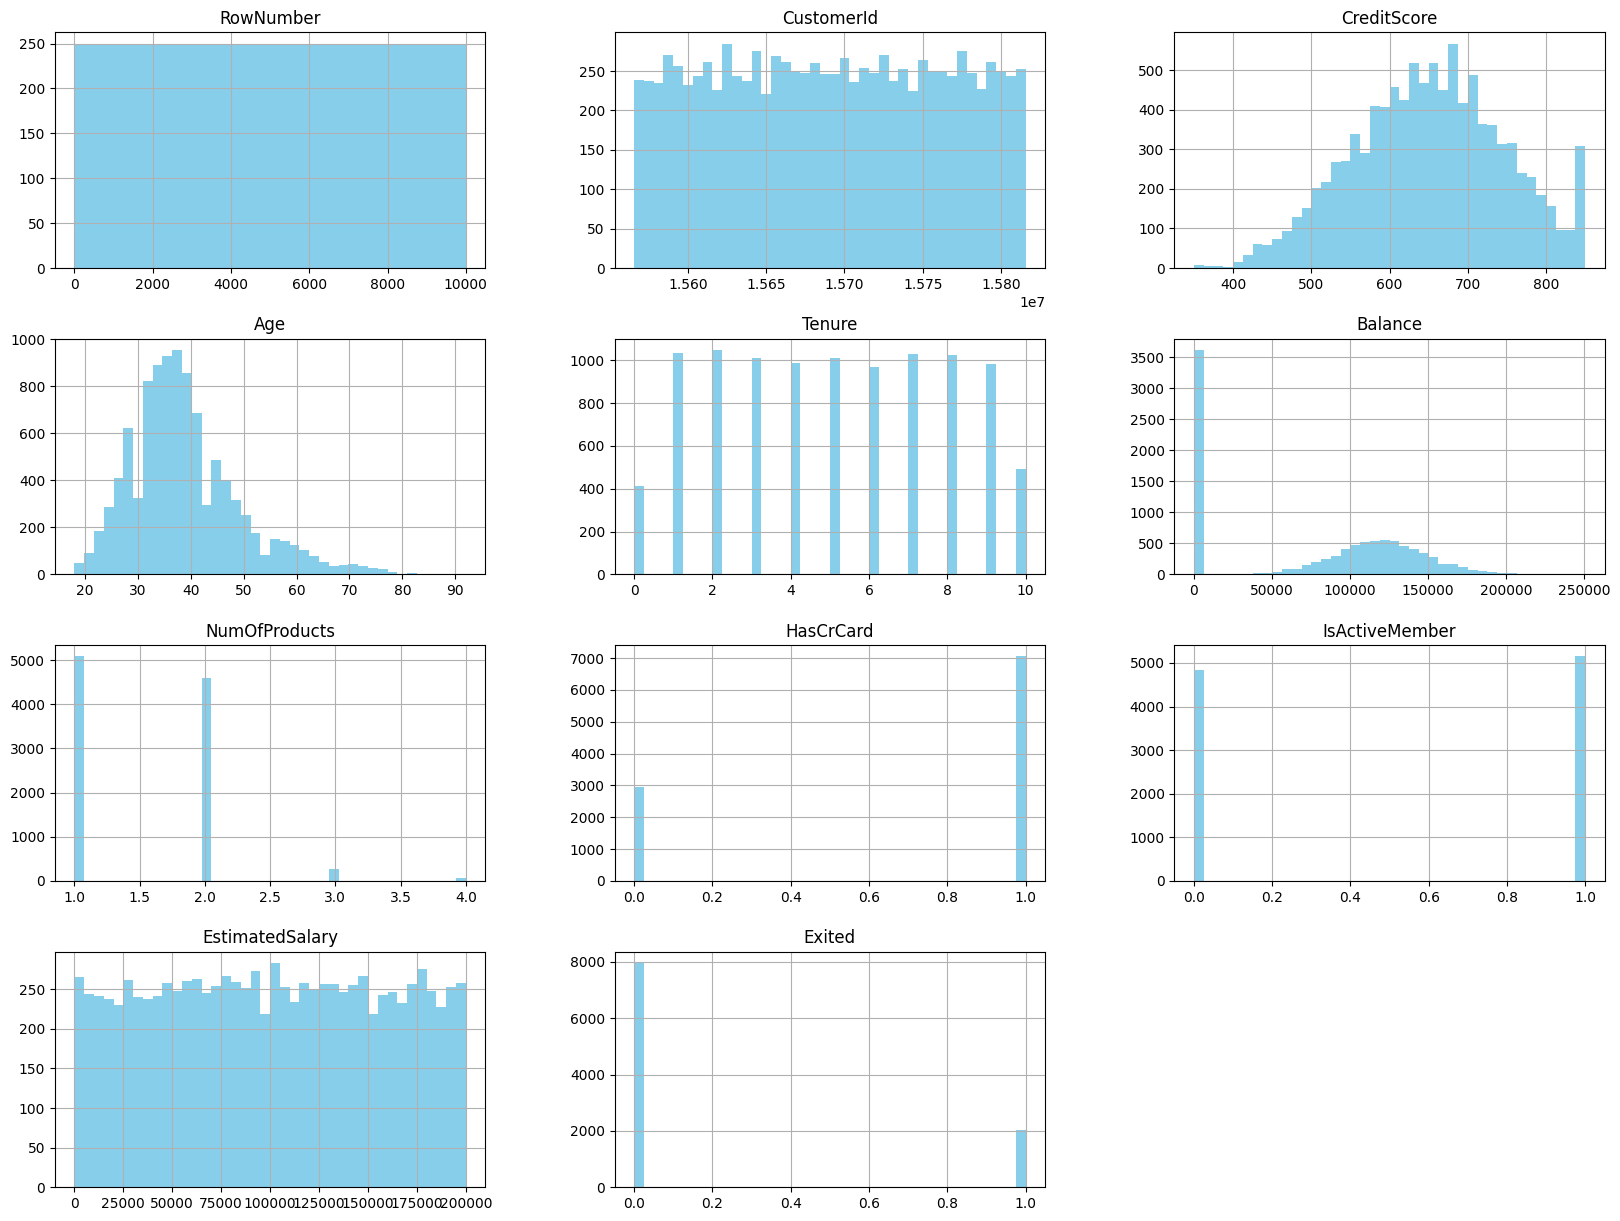

In [11]:
df.hist(bins=40, figsize=(20, 15), color="skyblue")
plt.show()

In [12]:
df[["Surname", "Geography", "Gender"]]

Surname Geography  Gender
0      Hargrave    France  Female
1          Hill     Spain  Female
2          Onio    France  Female
3          Boni    France  Female
4      Mitchell     Spain  Female
...         ...       ...     ...
9995   Obijiaku    France    Male
9996  Johnstone    France    Male
9997        Liu    France  Female
9998  Sabbatini   Germany    Male
9999     Walker    France  Female

[10000 rows x 3 columns]

In [13]:
columns_to_plot = [
    col for col in df.columns if col not in ["Surname", "Geography", "Gender"]
]

# Crea el diagrama de caja
fig = px.box(df, y=columns_to_plot)

fig.update_layout(title="Boxplot de Todas las Columnas")
fig.show()

### LIMPIEZA

#### Borramos las columnas innecesarias

In [14]:
df1 = df.drop(columns=["Surname", "RowNumber", "CustomerId"])
df1

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [15]:
df2 = df1.copy()

#### Convertimos los datos categoricos en numericos

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
df2["Gender"] = df2["Gender"].replace({"Female": 1, "Male": 0})

In [18]:
ciudad_unica = df2["Geography"].unique()
numero_ciudad = {ciudad: i + 1 for i, ciudad in enumerate(ciudad_unica)}
df2["Geography"] = df2["Geography"].map(numero_ciudad)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [20]:
df3 = df2.copy()

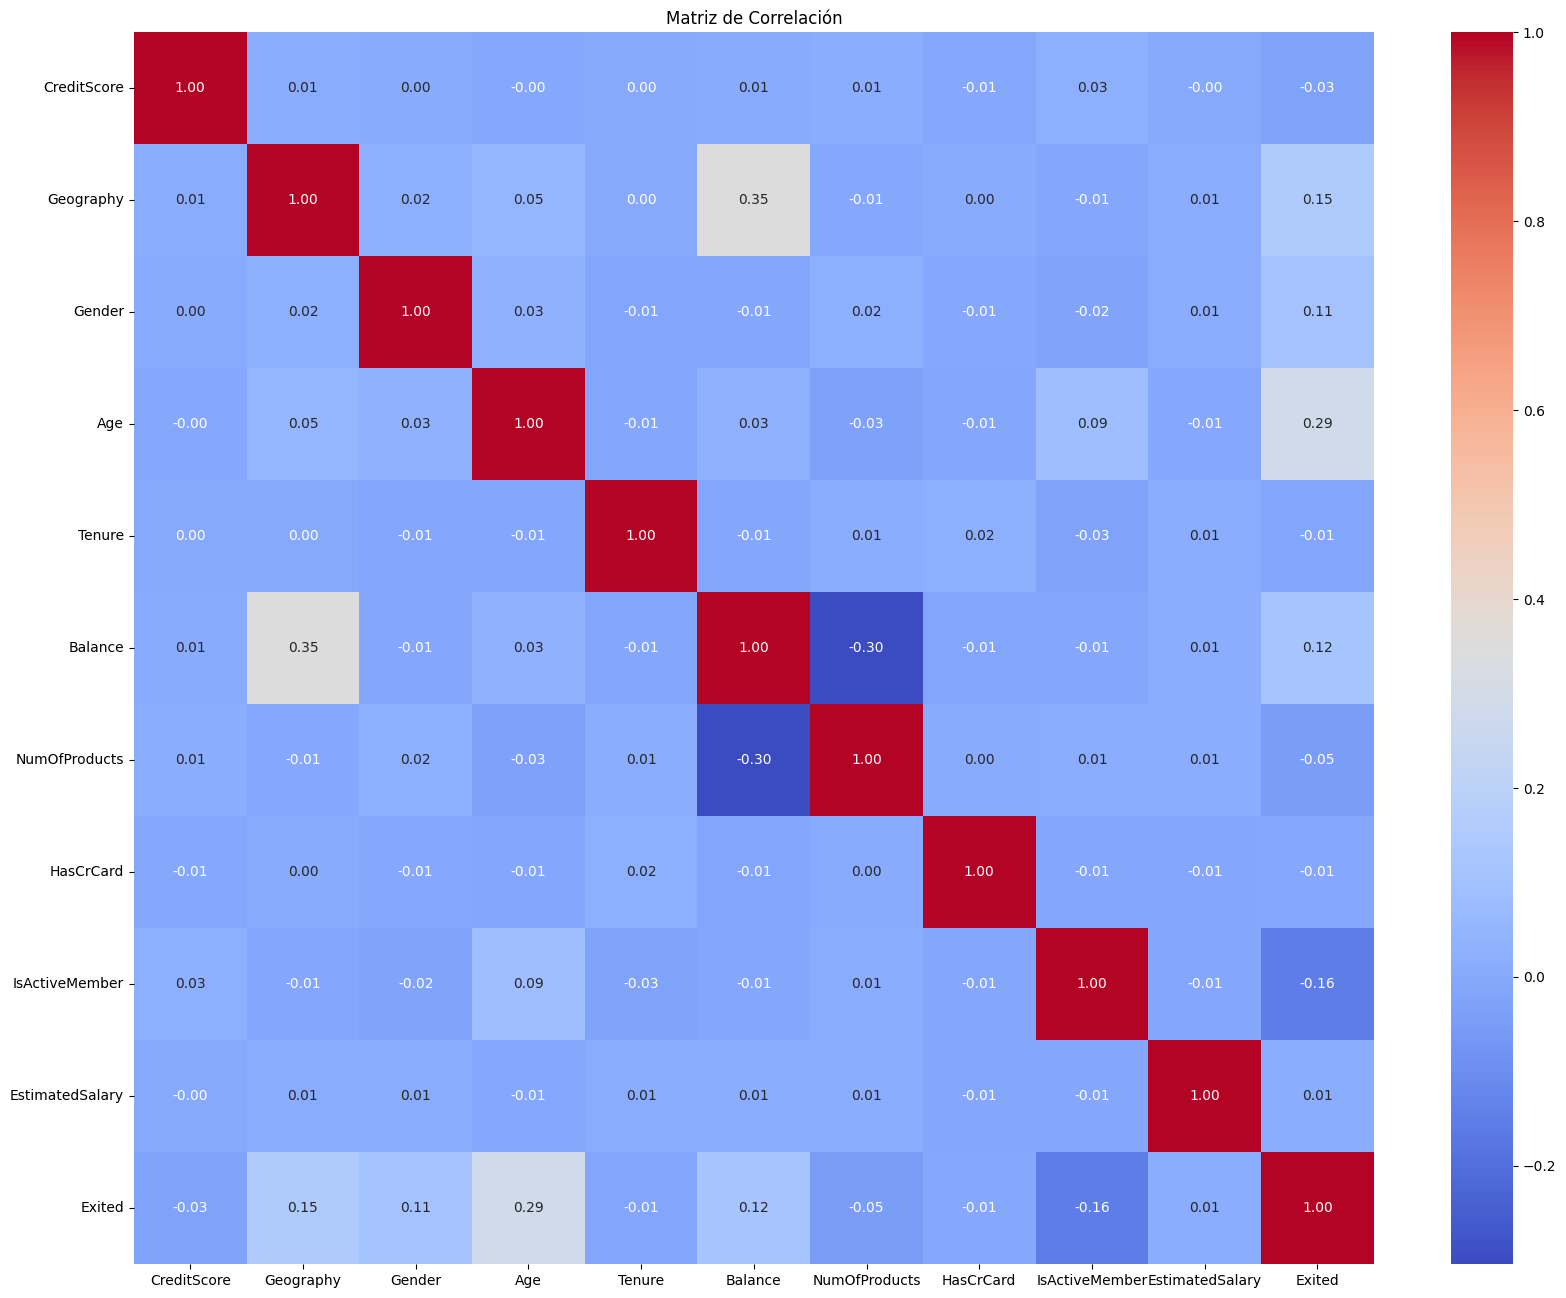

In [21]:
correlation_matrix = df3.corr()
# Configura el tamaño de la figura
plt.figure(figsize=(20, 16))
# Personaliza la paleta de colores y agrega anotaciones con dos decimales
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# Agrega título
plt.title("Matriz de Correlación")
# Muestra el gráfico
plt.show()

In [22]:
df3.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### MODELO

In [23]:
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### BALANCEO DE DATOS

In [24]:
X = df3.drop(["Exited"], axis=1)
y = df3["Exited"]
# code for undersampling
nm = NearMiss()
# Resampling of data of independent variable xand target variable y
data, target = nm.fit_resample(X, y)
print(data.shape)
print(target.shape)
print(data)
print(target)

(4074, 10)
(4074,)
      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             787          1       0   32       4       0.00              2   
1             754          2       1   27       8       0.00              2   
2             740          1       0   36       7       0.00              1   
3             718          1       0   29       2       0.00              1   
4             671          2       1   29       6       0.00              2   
...           ...        ...     ...  ...     ...        ...            ...   
4069          498          3       0   42       3  152039.70              1   
4070          655          3       1   46       7  137145.12              1   
4071          597          1       1   53       4   88381.21              1   
4072          709          1       1   36       7       0.00              1   
4073          772          3       0   42       3   75075.31              2   

      HasCrCard  IsActiveMember 

In [25]:
target.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [26]:
models = []
models.append(
    ("LogisticReg", LogisticRegression(solver="liblinear", multi_class="ovr"))
)
models.append(("LinearDiscAn", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART DecisionTree", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))
models.append(("randomforest", RandomForestClassifier()))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=0
)

In [28]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()), "\n")

[0.87883436 0.87116564 0.87730061 0.88343558 0.87557604]
LogisticReg: 0.877262 (0.004015) 

[0.87423313 0.86349693 0.88957055 0.87423313 0.86482335]
LinearDiscAn: 0.873271 (0.009321) 



[0.85889571 0.86809816 0.86349693 0.86503067 0.85253456]
KNN: 0.861611 (0.005424) 

[0.88496933 0.89110429 0.88496933 0.90490798 0.89093702]
CART DecisionTree: 0.891378 (0.007287) 

[0.87883436 0.87116564 0.87883436 0.88343558 0.87557604]
NB: 0.877569 (0.004064) 

[0.50153374 0.50153374 0.50306748 0.5        0.50230415]
SVM: 0.501688 (0.001018) 

[0.91564417 0.92331288 0.91564417 0.92944785 0.92626728]
randomforest: 0.922063 (0.005589) 



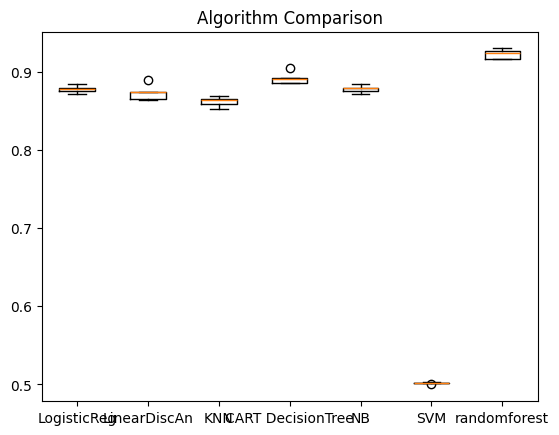

In [29]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

In [30]:
predict_list = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, accuracy_score(y_test, y_pred))
    print("Confusion Matrix", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

LogisticReg 0.8699386503067484
Confusion Matrix [[408   3]
 [103 301]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       411
           1       0.99      0.75      0.85       404

    accuracy                           0.87       815
   macro avg       0.89      0.87      0.87       815
weighted avg       0.89      0.87      0.87       815

LinearDiscAn 0.8674846625766871
Confusion Matrix [[406   5]
 [103 301]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       411
           1       0.98      0.75      0.85       404

    accuracy                           0.87       815
   macro avg       0.89      0.87      0.87       815
weighted avg       0.89      0.87      0.87       815



KNN 0.8564417177914111
Confusion Matrix [[393  18]
 [ 99 305]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       411
           1       0.94      0.75      0.84       404

    accuracy                           0.86       815
   macro avg       0.87      0.86      0.85       815
weighted avg       0.87      0.86      0.85       815

CART DecisionTree 0.8846625766871166
Confusion Matrix [[362  49]
 [ 45 359]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       411
           1       0.88      0.89      0.88       404

    accuracy                           0.88       815
   macro avg       0.88      0.88      0.88       815
weighted avg       0.88      0.88      0.88       815

NB 0.8723926380368098
Confusion Matrix [[411   0]
 [104 300]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       411
           1       1.00      0.74  

/home/grazia/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/grazia/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/grazia/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



randomforest 0.9276073619631902
Confusion Matrix [[391  20]
 [ 39 365]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       411
           1       0.95      0.90      0.93       404

    accuracy                           0.93       815
   macro avg       0.93      0.93      0.93       815
weighted avg       0.93      0.93      0.93       815



# PICKLE

In [31]:
import pickle  # Importamos la libreria

Guardar la lista de modelos en un archivo

In [32]:
with open("modelos.pkl", "wb") as archivo:
    pickle.dump(models, archivo)

Cargar la lista de modelos desde el archivo

In [33]:
with open("modelos.pkl", "rb") as archivo:
    modelos_cargados = pickle.load(archivo)

Buscar el modelo SVM en la lista de modelos

In [42]:
modelo_randomforest = None
for nombre, modelo in modelos_cargados:
    if nombre == "randomforest":
        modelo_randomforest = modelo
        break

### Comprobación de una persona aleatoria:

In [35]:
import numpy as np

In [41]:
X_train

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
3807          597          2       0   43       2   85162.26              1   
2058          622          2       1   46       4  107073.27              2   
263           711          2       1   28       5       0.00              2   
1764          726          1       1   38       4       0.00              2   
1225          537          1       1   53       3       0.00              1   
...           ...        ...     ...  ...     ...        ...            ...   
835           581          1       0   37       7       0.00              2   
3264          692          3       0   45       6  142084.04              4   
1653          721          1       0   41       7       0.00              2   
2607          598          1       1   64       9       0.00              1   
2732          560          2       1   43       4   95140.44              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
3807          0               1          5104.08  
2058          1               1         30984.59  
263           1               1         93959.96  
1764          0               0          6787.48  
1225          1               1         91406.62  
...         ...             ...              ...  
835           1               1         74320.75  
3264          1               0        188305.85  
1653          0               1         61018.85  
2607          0               1         13181.37  
2732          1               0        123181.44  

[3259 rows x 10 columns]

In [45]:
datos_de_prueba = [
    (619, 1, 1, 42, 2, 0.00, 1, 1, 1, 101348.88),
    (516, 1, 0, 35, 10, 57369.61, 1, 1, 1, 101699.77),
    (497, 2, 0, 24, 3, 0.00, 2, 1, 0, 76390.01),
    (699, 1, 1, 39, 1, 0.00, 2, 0, 0, 0.00),
]

In [46]:
for tupla in datos_de_prueba:
    try:
        # Convierte cada tupla en una matriz 2D (array) antes de hacer la predicción
        input_data_reshaped = np.array([tupla])
        prediction = model.predict(input_data_reshaped)

        if prediction[0] == 0:
            print("💚 El cliente está satisfecho con el banco")
        elif prediction[0] == 1:
            print("💔 ALERTA!!! El cliente tiene una alta probabilidad de irse")
    except Exception as e:
        print(f"Error al hacer la predicción: {e}")

💔 ALERTA!!! El cliente tiene una alta probabilidad de irse
💔 ALERTA!!! El cliente tiene una alta probabilidad de irse
💚 El cliente está satisfecho con el banco
💚 El cliente está satisfecho con el banco


/home/grazia/miniconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/home/grazia/miniconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/home/grazia/miniconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/home/grazia/miniconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

